# Hoja de Trabajo 1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

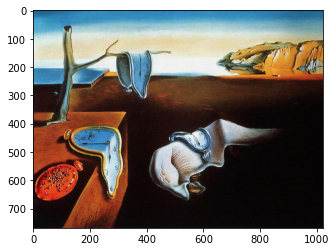

In [143]:
img = cv2.imread('img.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

# Problema 1

Desarrolle una funcion la cual reciba dos parametros, una imagen y un entero llamado color, la
funcion debe devolver una imagen la cual tenga activos los canales de color segun los siguientes
puntos:
* Si el parametro color vale 1, la imagen debe mostrar activos unicamente el color azul.
* Si el parametro color vale 2, la imagen debe mostrar activos unicamente el color verde.
* Si el parametro color vale 3, la imagen debe mostrar activos unicamente el color rojo.
* Si el parametro color vale 10, la imagen debe mostrar activos unicamente los colores rojo y verde.
* Si el parametro color vale 20, la imagen debe mostrar activos unicamente los colores verde y azul.
* Si el parametro color vale 30, la imagen debe mostrar activos unicamente los colores azul y rojo.

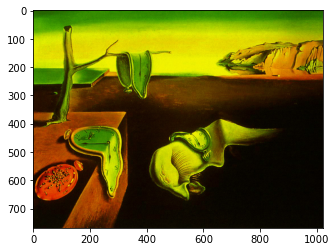

In [317]:
def capas(img, color=1):
    canvas = np.zeros(img.shape)
    red = img[:,:,0]
    green = img[:,:,1]
    blue = img[:,:,2]

    if color == 1:
        canvas[:,:,2] = blue
    elif color == 2:
        canvas[:,:,1] = green
    elif color == 3:
        canvas[:,:,0] = red
    elif color == 10:
        canvas[:,:,0] = red
        canvas[:,:,1] = green
    elif color == 20:
        canvas[:,:,1] = green
        canvas[:,:,2] = blue
    elif color == 30:
        canvas[:,:,0] = red
        canvas[:,:,2] = blue
    else:
        print('Numero no permitido, imagen np.zeros')

    cv2.imwrite('fig1.jpg', canvas)
    img_p = cv2.imread('fig1.jpg')

    plt.imshow(img_p)
    plt.show()
    
    return canvas

mix = capas(img, 10)

# Problema 2

En el .zip del laboratorio se le compartio un conjunto de imagenes en escala de grises (imagen1,
imagen2, perro) estas imagenes fueron creadas utilizando una escala de grises en 3D, cree una
funcion que dadas las 3 imagenes se construya la imagen original a color.

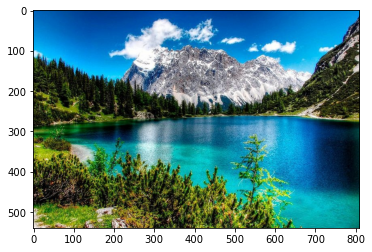

In [316]:
def recontruccion(imgR, imgG, imgB):
    if ((imgR.shape == imgG.shape) & (imgG.shape == imgB.shape)):
        
        canvas = np.zeros((imgR.shape[0], imgR.shape[1], 3))

        canvas[:,:,0] = imgR
        canvas[:,:,1] = imgG
        canvas[:,:,2] = imgB

        cv2.imwrite('fig2.jpg', canvas)
        img_p = cv2.imread('fig2.jpg')

        plt.imshow(img_p)
        plt.show()
    else:
        print('Dimenciones no coindicen')
    return canvas
    

img1 = cv2.imread('imagen1\imagen1_salida_gray_rojo.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('imagen1\imagen1_salida_gray_verde.jpg', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('imagen1\imagen1_salida_gray_azul.jpg', cv2.IMREAD_GRAYSCALE)

rec = recontruccion(img1, img2, img3)

# Problema 3

Cree una funcion que dada una imagen cree una escala de grises en tres dimensiones, tome en
cuenta que su funcion debe crear 3 imagenes como salida. Para entregar este ejercicio debe incluir
una las imagenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la
imagen del Problema #2.

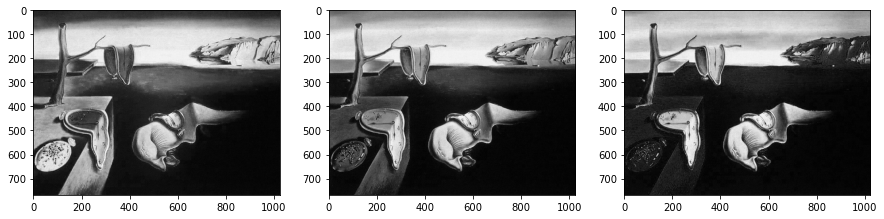

In [306]:
def grayScale3D(img):
    imgR = img[:,:,0]
    imgG = img[:,:,1]
    imgB = img[:,:,2]
    
    # Syntax: plt.subplots(col, rows, size)
    f, axarr = plt.subplots(1, 3, figsize=(15, 8))
    axarr[0].imshow(imgR, cmap='gray')
    axarr[1].imshow(imgG, cmap='gray' )
    axarr[2].imshow(imgB, cmap='gray' )
    plt.show()

    return [imgR, imgG, imgB]

imgR, imgG, imgB = grayScale3D(img)

# Problema 4

Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de
escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funciones
de opencv), sus histogramas deben incluir una l´ınea vertical la cual muestre el valor de la media
de la distribucion.

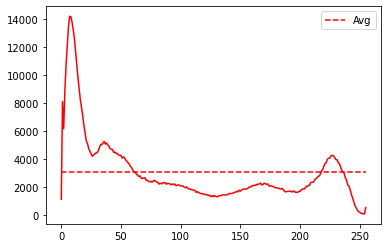

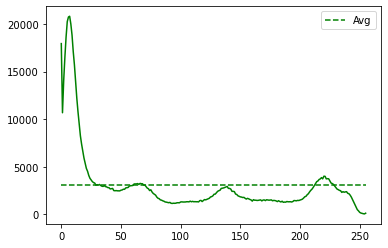

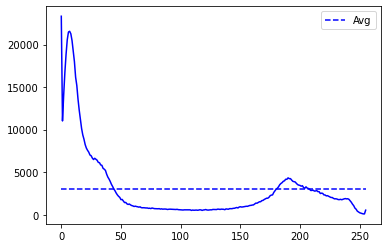

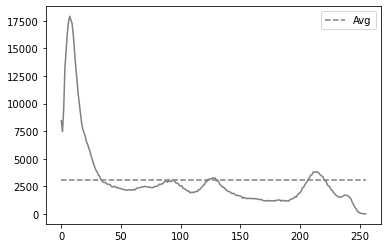

In [315]:
def hist(img):
    red = img[:,:,0]
    green = img[:,:,1]
    blue = img[:,:,2]

    gray = np.round(red/3 + green/3 + blue/3).astype('uint8')


    # Syntax: cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
    histR = cv2.calcHist([red], [0], None, [256], [0, 256])
    histG = cv2.calcHist([green], [0], None, [256], [0, 256])
    histB = cv2.calcHist([blue], [0], None, [256], [0, 256])
    histGr = cv2.calcHist([gray], [0], None, [256], [0, 256])

    _r = plt.plot(histR, color='red')
    _r = plt.plot([0, 255], [histR.mean(), histR.mean()], color='red', linestyle='dashed', label='Avg')
    plt.legend()
    plt.show()

    _g = plt.plot(histG, color='green')
    _g = plt.plot([0, 255], [histG.mean(), histG.mean()], color='green', linestyle='dashed', label='Avg')
    plt.legend()
    plt.show()

    _b = plt.plot(histB, color='blue')
    _b = plt.plot([0, 255], [histB.mean(), histB.mean()], color='blue', linestyle='dashed', label='Avg')
    plt.legend()
    plt.show()

    _gr = plt.plot(histGr, color='gray')
    _gr = plt.plot([0, 255], [histGr.mean(), histGr.mean()], color='gray', linestyle='dashed', label='Avg')
    plt.legend()
    plt.show()
    
    return [histR, histG, histB, histGr]
    
histR, histG, histB, histGr = hist(img)

# Problema 5

Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una
funcion que dada una imagen, realice una escala de grises ponderada (notar que no existe una
solucion unica).

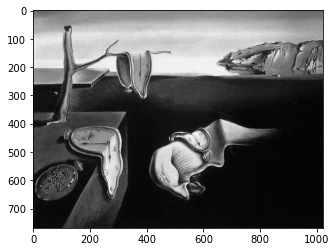

In [318]:
def grayWeighted(img):
    red = img[:,:,0]
    green = img[:,:,1]
    blue = img[:,:,2]

    # escala de grises con media ponderada, se le da prioridad al color verde
    gray = np.round(red*0.114 + green*0.587 + blue*0.299).astype('uint8')

    plt.imshow(gray, cmap='gray')
    plt.show()
    return gray

gray = grayWeighted(img)

# Problema 6

Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho
espacio, para entregar este ejercicio puede hacerlo por medio de Markdown en el mismo Notebook
donde trabajo los demas ejercicios

* 